In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wiki = 'https://bulbapedia.bulbagarden.net/wiki/Signature_move'
page = requests.get(wiki)
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
sigmove_table = soup.find('table')

In [4]:
str_lst = []

for row in sigmove_table.findAll('tr'):
    cells = row.findAll('td')
    for cell in cells:
        raw_str = str(cell)
        str_lst.append(raw_str)

In [5]:
str_lst

['<td rowspan="1" width="26px"> 003\n</td>',
 '<td width="32px"> <a href="/wiki/Venusaur_(Pok%C3%A9mon)" title="Venusaur"><img alt="Venusaur" height="40" src="//cdn.bulbagarden.net/upload/d/df/003MS.png" width="40"/></a>\n</td>',
 '<td rowspan="1"> <a href="/wiki/Venusaur_(Pok%C3%A9mon)" title="Venusaur (Pokémon)">Venusaur</a>\n</td>',
 '<td rowspan="1" style="text-align:center; background:#FFF; color:#FFF">\n</td>',
 '<td rowspan="1" style="text-align:center; background:#FFF; color:#FFF">\n</td>',
 '<td rowspan="1" style="text-align:center; background:#9CD7C8; color:#FFF"> <b><a href="/wiki/Frenzy_Plant_(move)" title="Frenzy Plant (move)"><span style="color:#fff">Frenzy Plant</span></a><span class="explain" title="Prior to Pokémon XD">*</span></b>\n</td>',
 '<td rowspan="1" style="text-align:center; background:#FFF; color:#FFF">\n</td>',
 '<td rowspan="1" style="text-align:center; background:#FFF; color:#FFF">\n</td>',
 '<td rowspan="1" style="text-align:center; background:#FFF; color

In [55]:
ref_lst = []

for string in str_lst:
    if '(move)' in string:
        ref_lst.append(string)

In [56]:
# DO NOT USE THIS CELL IF NOT ANALYZING SIGNATURE MOVES

z_move_str = str(soup)

ind = z_move_str.index('id="Z-Moves"')
z_move_str = z_move_str[ind:]
ind = z_move_str.index('/table')
z_move_str = z_move_str[:ind]

ref_lst.append(z_move_str)

In [57]:
ref_lst

['<td rowspan="1" style="text-align:center; background:#9CD7C8; color:#FFF"> <b><a href="/wiki/Frenzy_Plant_(move)" title="Frenzy Plant (move)"><span style="color:#fff">Frenzy Plant</span></a><span class="explain" title="Prior to Pokémon XD">*</span></b>\n</td>',
 '<td rowspan="1" style="text-align:center; background:#9CD7C8; color:#FFF"> <b><a href="/wiki/Blast_Burn_(move)" title="Blast Burn (move)"><span style="color:#fff">Blast Burn</span></a><span class="explain" title="Prior to Pokémon XD">*</span></b>\n</td>',
 '<td rowspan="1" style="text-align:center; background:#DCD677; color:#FFF"> <b><a href="/wiki/Skull_Bash_(move)" title="Skull Bash (move)"><span style="color:#fff">Skull Bash</span></a></b>\n</td>',
 '<td rowspan="1" style="text-align:center; background:#DCD677; color:#FFF"> <b><a href="/wiki/Skull_Bash_(move)" title="Skull Bash (move)"><span style="color:#fff">Skull Bash</span></a></b>\n</td>',
 '<td rowspan="1" style="text-align:center; background:#DCD677; color:#FFF"> <

In [58]:
move_lst = []

# For each string in the ref list, find moves
for string in ref_lst:
    
    # Iterator contains moves
    new_itr = re.finditer('wiki(.+?)move', string)
    
    # Find the strings via the iterator
    for found_str in new_itr:
        new_str = found_str.group(0)
    
        # Handling weird names
        if 'ExtremeSpeed' in new_str:
            new_str = new_str.replace('ExtremeSpeed','Extreme_Speed')

        if 'GrassWhistle' in new_str:
            new_str = new_str.replace('GrassWhistle','Grass_Whistle')

        if 'FeatherDance' in new_str:
            new_str = new_str.replace('FeatherDance','Feather_Dance')

        if 'Softboiled' in new_str:
            new_str = new_str.replace('Softboiled','Soft-Boiled')

        if 'Conversion2' in new_str:
            new_str = new_str.replace('Conversion2','Conversion_2')
            
        if 'SmellingSalt' in new_str:
            new_str = new_str.replace('SmellingSalt','Smelling_Salts')

        if 'Smelling_Salt' in new_str:
            new_str = new_str.replace('Smelling_Salt','Smelling_Salts')
            
        if 'Hi_Jump_Kick' in new_str:
            new_str = new_str.replace('Hi_Jump_Kick','High_Jump_Kick')

        if new_str not in move_lst:
            move_lst.append(new_str)

In [59]:
for i in range(0,len(move_lst)):
    move_lst[i] = move_lst[i].replace('_(move','').replace('wiki/','').replace('%27',"'")

In [60]:
move_lst[73] = 'Smelling_Salts'
move_lst

['Frenzy_Plant',
 'Blast_Burn',
 'Skull_Bash',
 'Hydro_Cannon',
 'Twineedle',
 'Gust',
 'Feather_Dance',
 'Hyper_Fang',
 'Super_Fang',
 'Glare',
 'Volt_Tackle',
 'Petal_Dance',
 'Spore',
 'Fissure',
 'Pay_Day',
 'Extreme_Speed',
 'Kinesis',
 'Low_Kick',
 'Vital_Throw',
 'Strength',
 'Clamp',
 'Icicle_Spear',
 'Night_Shade',
 'Crabhammer',
 'Barrage',
 'Dragon_Hammer',
 'Bone_Club',
 'Bonemerang',
 'Bone_Rush',
 'Shadow_Bone',
 'Jump_Kick',
 'High_Jump_Kick',
 'Rolling_Kick',
 'Mega_Kick',
 'Mach_Punch',
 'Vacuum_Wave',
 'Soft-Boiled',
 'Dizzy_Punch',
 'Waterfall',
 'Camouflage',
 'Substitute',
 'Lovely_Kiss',
 'Splash',
 'Conversion',
 'Sharpen',
 'Conversion_2',
 'Sky_Attack',
 'Outrage',
 'Psystrike',
 'Spider_Web',
 'Toxic_Thread',
 'Mimic',
 'Morning_Sun',
 'Pain_Split',
 'Psywave',
 'Spikes',
 'Metal_Claw',
 'Megahorn',
 'Beat_Up',
 'Octazooka',
 'Present',
 'Steel_Wing',
 'Sketch',
 'Triple_Kick',
 'Milk_Drink',
 'Aeroblast',
 'Sacred_Fire',
 'Leaf_Blade',
 'Blaze_Kick',
 'Muddy_

In [61]:
txt = "SigMoves.txt"

with open(txt, "w") as output:
    for move in move_lst:
        output.write(move)
        output.write('\n')
    output.close()

In [63]:
# Use html as a string
pagedata = str(pagesoup)

init_targ = 'MoveInfobox'
target_str = 'type='

index = pagedata.index(btarg)
pagedata = pagedata[index:]

# Obtain index of target
index = pagedata.index(target_str)
index += len(target_str)

# Obtain the desired data
pagedata = pagedata[index:]
index = pagedata.index('|')
pagedata = pagedata[:index]
pagedata = pagedata.strip()

Grass


In [64]:
# Contains the data of the moves (list of list of strings)
data_lst = []

# Attributes of interest for each move
tarstring_lst = ['Types','Damage Categories','Powers','Accuracies','Generations']
target_lst = ['type=','damagecategory=','power=','accuracy=','gen=']
init_targ = 'MoveInfobox'

for move in move_lst:

    print('Handling... ',move)
    
    movewiki = 'https://bulbapedia.bulbagarden.net/w/index.php?title=' + move + '_(move)&action=edit'
    movepage = requests.get(movewiki)
    movesoup = BeautifulSoup(movepage.content,'html.parser')

    # Temporary list for each individual move
    indiv_lst = []
    
    # Find info for each target
    for target in target_lst:
        
        # Use html as a string
        movedata = str(movesoup)

        # First, make sure we are only looking at move data
        index = movedata.index(init_targ)
        movedata = movedata[index:]
        
        # Obtain index of target
        index = movedata.index(target)
        index += len(target)

        # Obtain the desired data
        movedata = movedata[index:]
        index = movedata.index('|')
        
        if movedata[:index].strip() == '{{tt':
            movedata = movedata[5:]
        
        index = movedata.index('|')
        
        movedata = movedata[:index]
        movedata = movedata.strip()
        
        # Add desired data to the list
        indiv_lst.append(movedata)
    
    # Add the list of an individual move to the list for all moves
    data_lst.append(indiv_lst)

Handling...  Frenzy_Plant
Handling...  Blast_Burn
Handling...  Skull_Bash
Handling...  Hydro_Cannon
Handling...  Twineedle
Handling...  Gust
Handling...  Feather_Dance
Handling...  Hyper_Fang
Handling...  Super_Fang
Handling...  Glare
Handling...  Volt_Tackle
Handling...  Petal_Dance
Handling...  Spore
Handling...  Fissure
Handling...  Pay_Day
Handling...  Extreme_Speed
Handling...  Kinesis
Handling...  Low_Kick
Handling...  Vital_Throw
Handling...  Strength
Handling...  Clamp
Handling...  Icicle_Spear
Handling...  Night_Shade
Handling...  Crabhammer
Handling...  Barrage
Handling...  Dragon_Hammer
Handling...  Bone_Club
Handling...  Bonemerang
Handling...  Bone_Rush
Handling...  Shadow_Bone
Handling...  Jump_Kick
Handling...  High_Jump_Kick
Handling...  Rolling_Kick
Handling...  Mega_Kick
Handling...  Mach_Punch
Handling...  Vacuum_Wave
Handling...  Soft-Boiled
Handling...  Dizzy_Punch
Handling...  Waterfall
Handling...  Camouflage
Handling...  Substitute
Handling...  Lovely_Kiss
Handl

In [65]:
# The dictionaries that have the counts
type_counts = dict()
damagecategory_counts = dict()
power_counts = dict()
accuracy_counts = dict()
gen_counts = dict()

# Easy access to all the dictionaries
target_dicts = [type_counts, damagecategory_counts, power_counts, accuracy_counts, gen_counts]

for movedata in data_lst:
    
    # For type counts
    if movedata[0] not in type_counts:
        type_counts[movedata[0]] = 1
    else:
        type_counts[movedata[0]] += 1
        
    # For damage category counts
    if movedata[1] not in damagecategory_counts:
        damagecategory_counts[movedata[1]] = 1
    else:
        damagecategory_counts[movedata[1]] += 1
        
    # For power counts
    if movedata[2] not in power_counts:
        power_counts[movedata[2]] = 1
    else:
        power_counts[movedata[2]] += 1
        
    # For accuracy counts
    if movedata[3] not in accuracy_counts:
        accuracy_counts[movedata[3]] = 1
    else:
        accuracy_counts[movedata[3]] += 1
        
    # For generation counts
    if movedata[4] not in gen_counts:
        gen_counts[movedata[4]] = 1
    else:
        gen_counts[movedata[4]] += 1

Handling...  Types


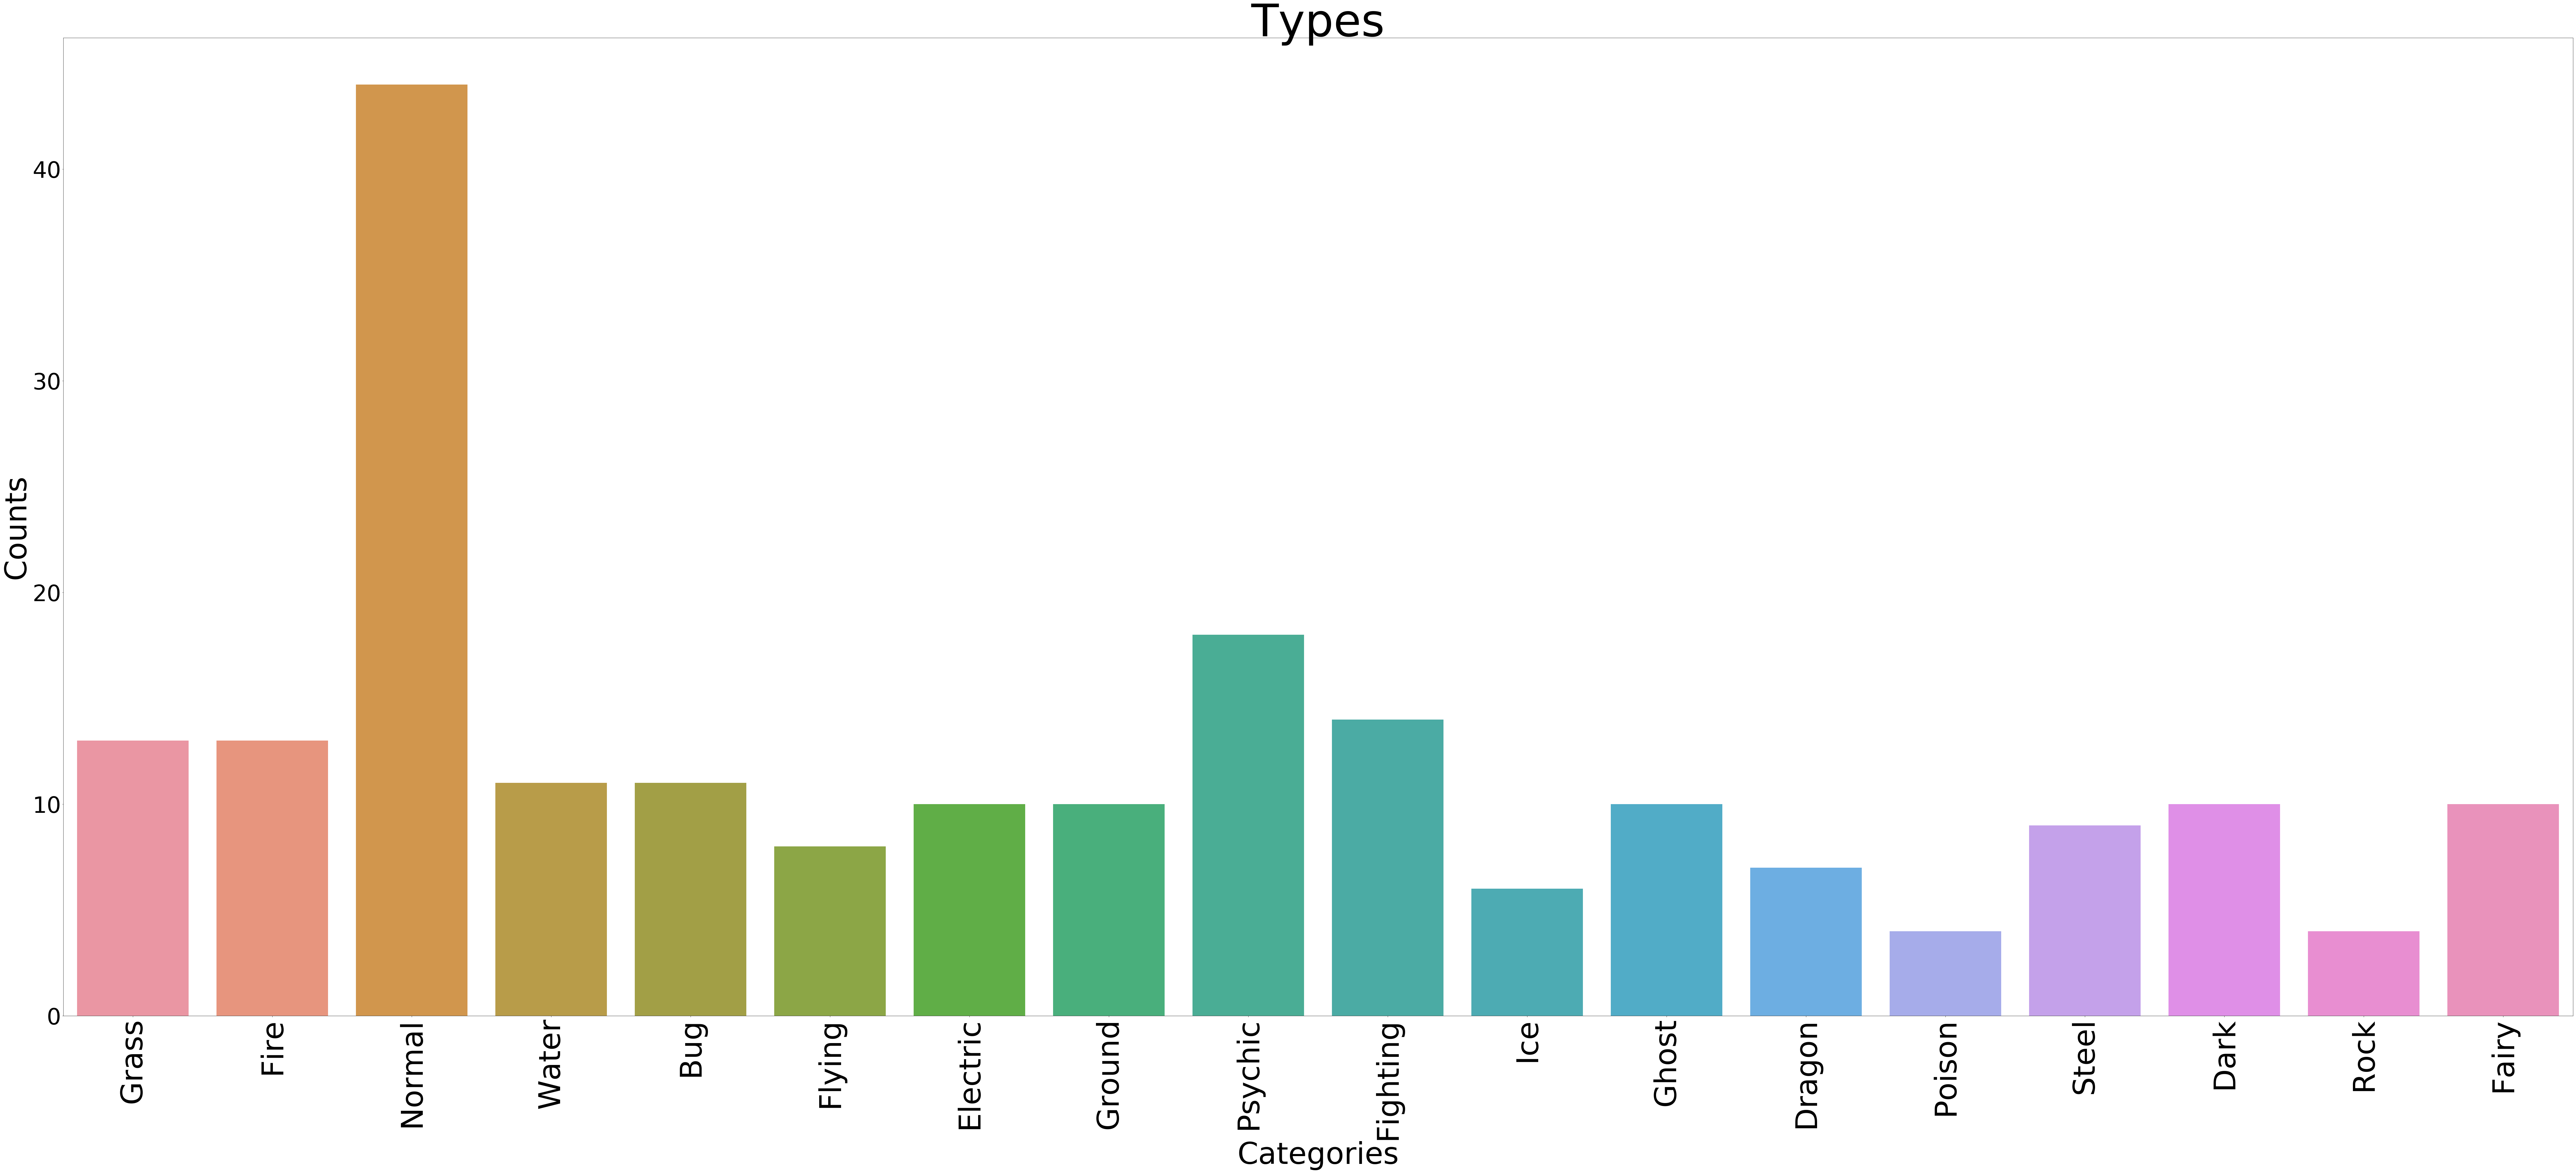

Handling...  Damage Categories


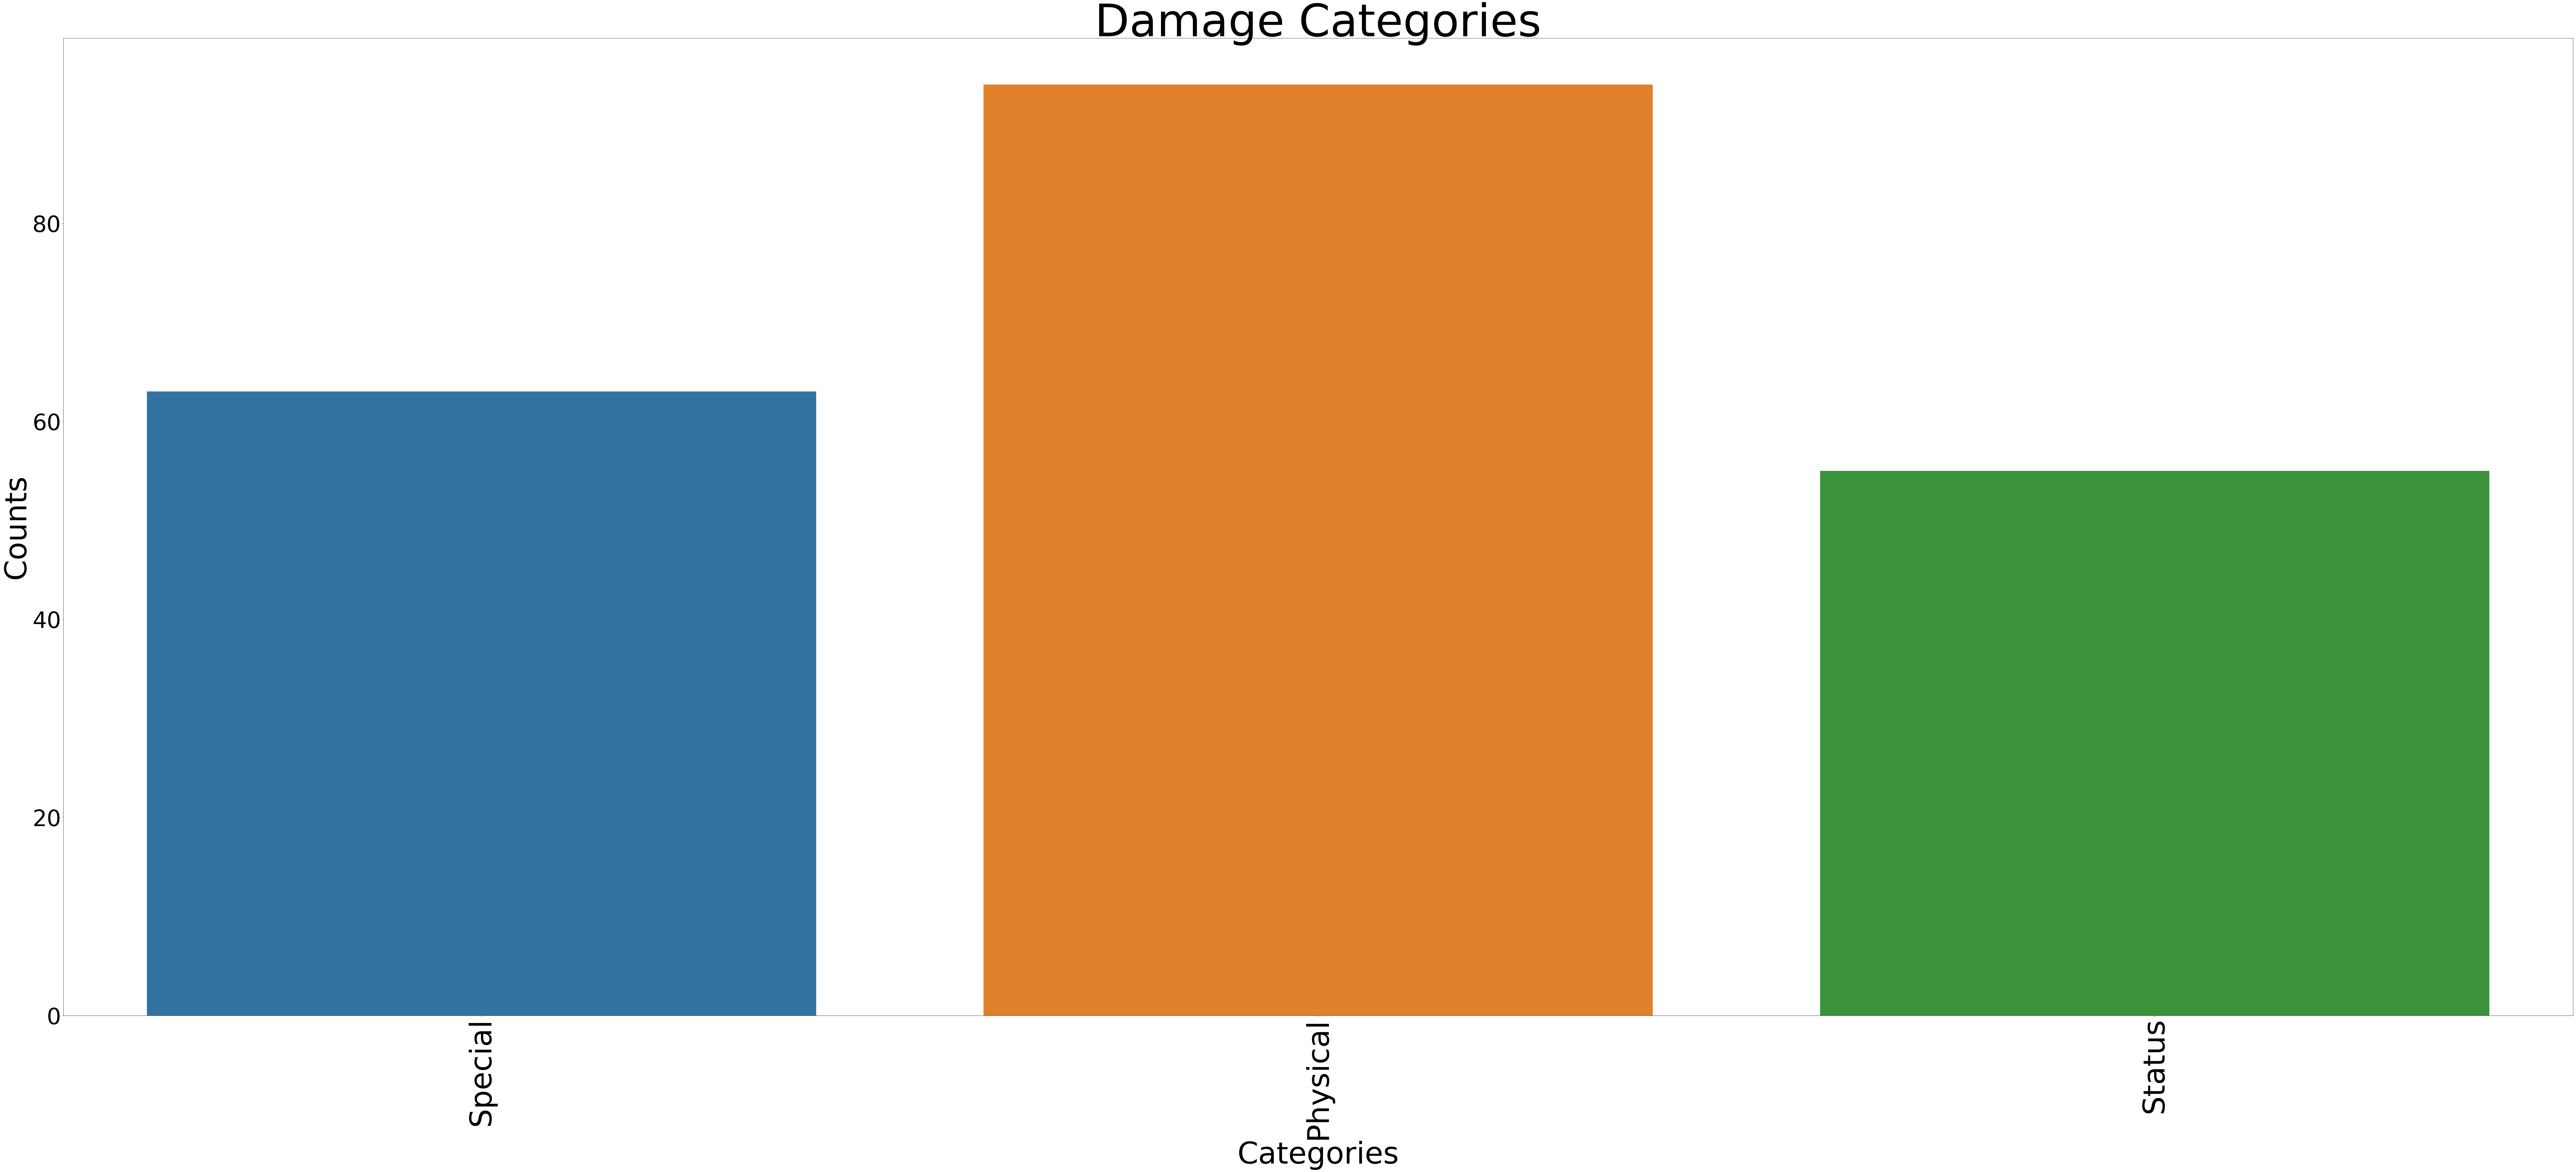

Handling...  Powers


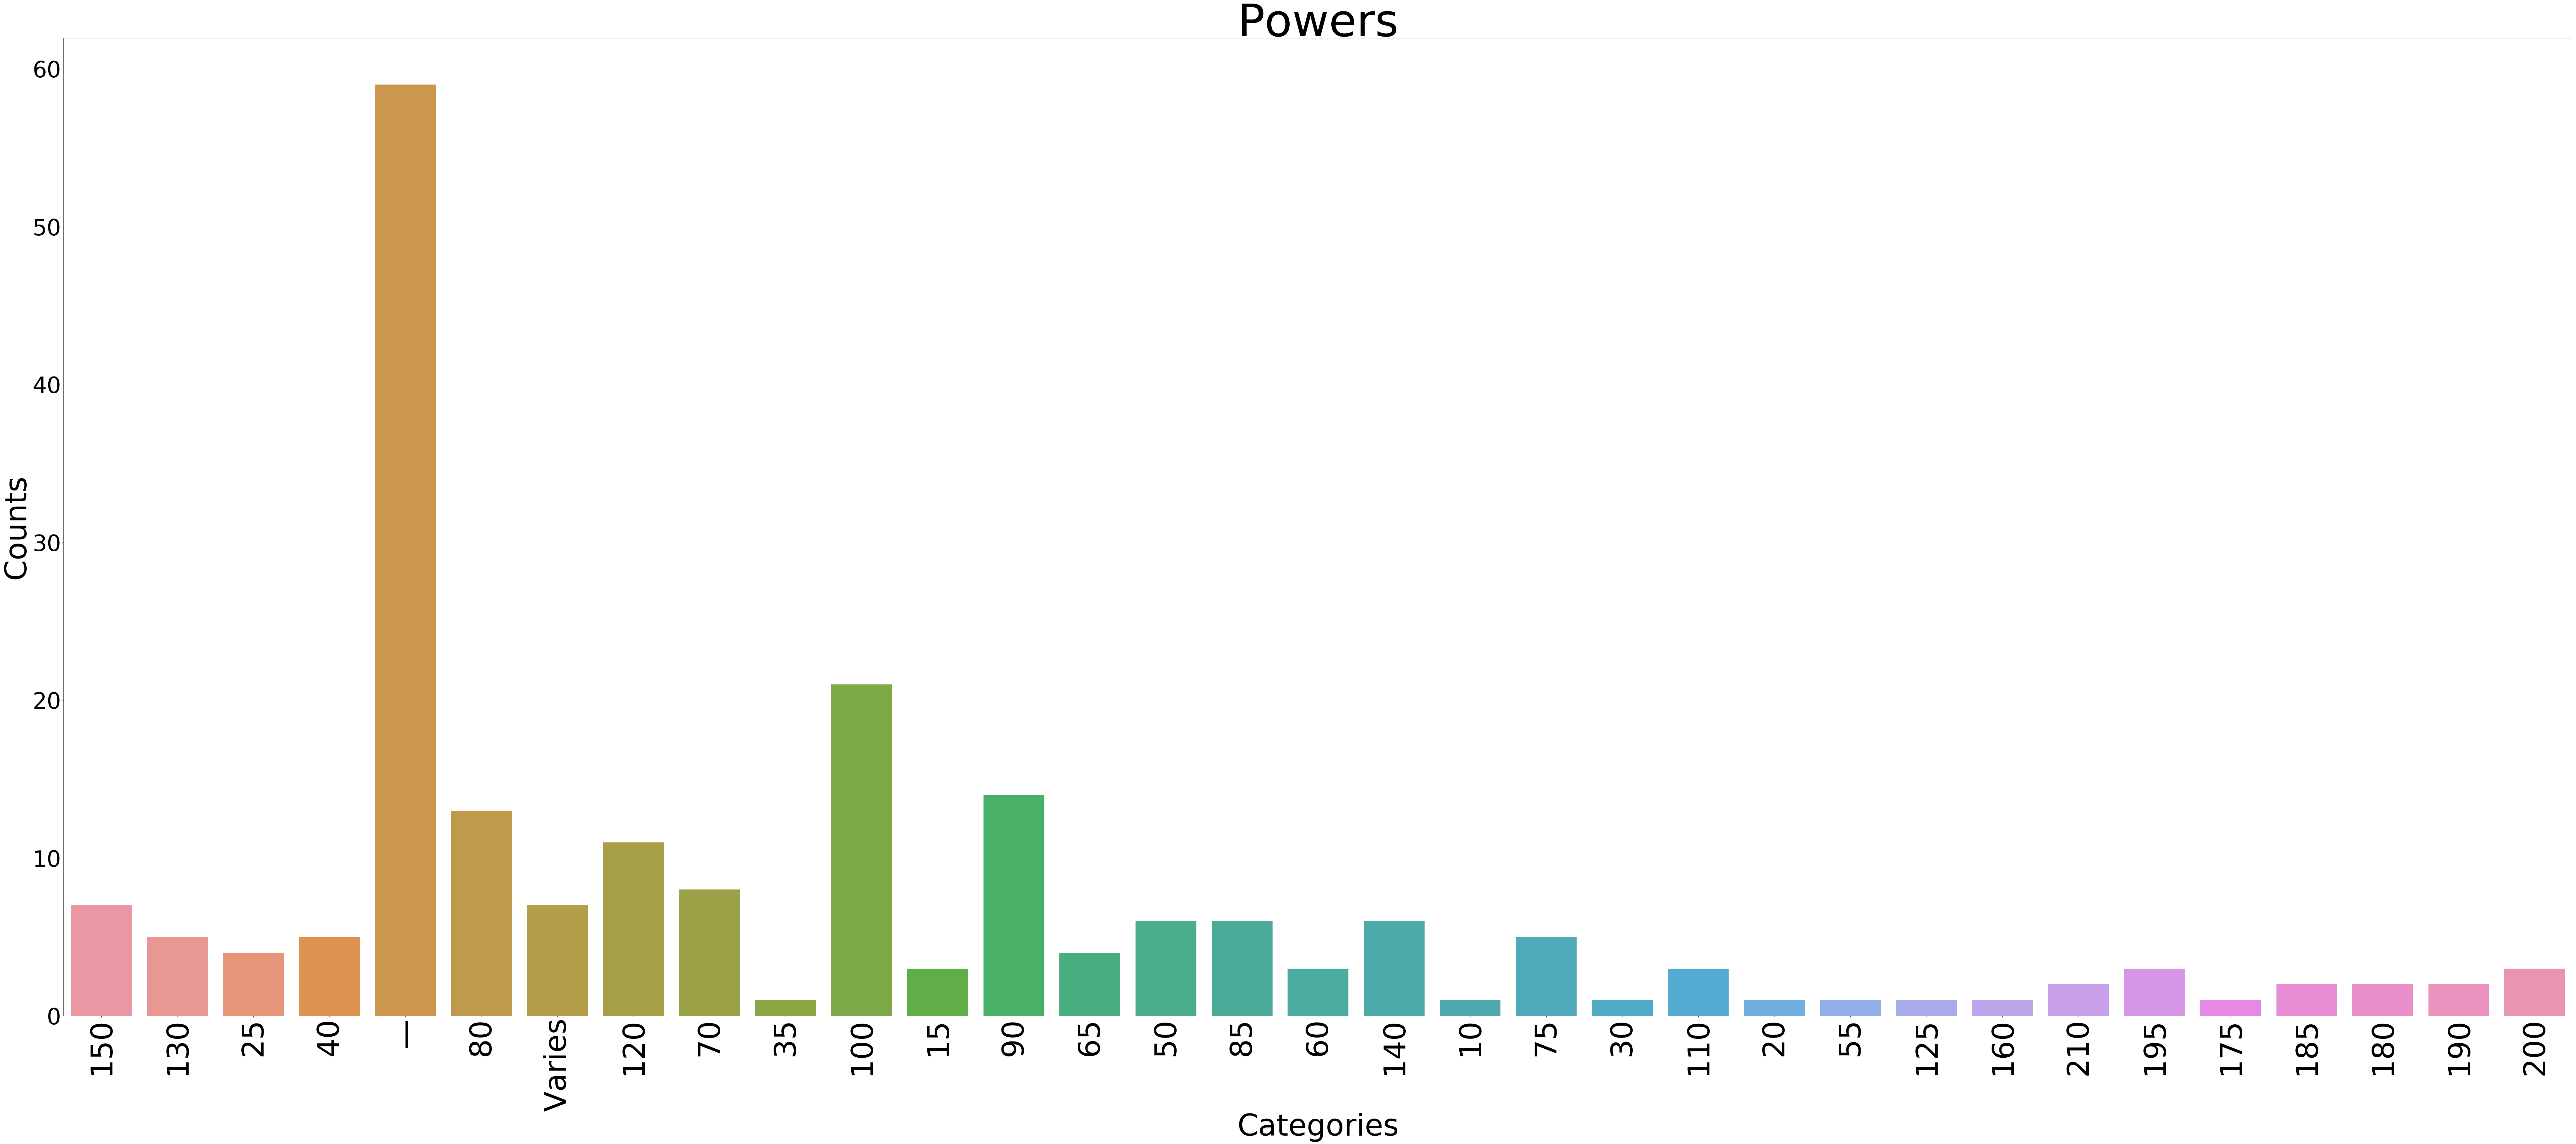

Handling...  Accuracies


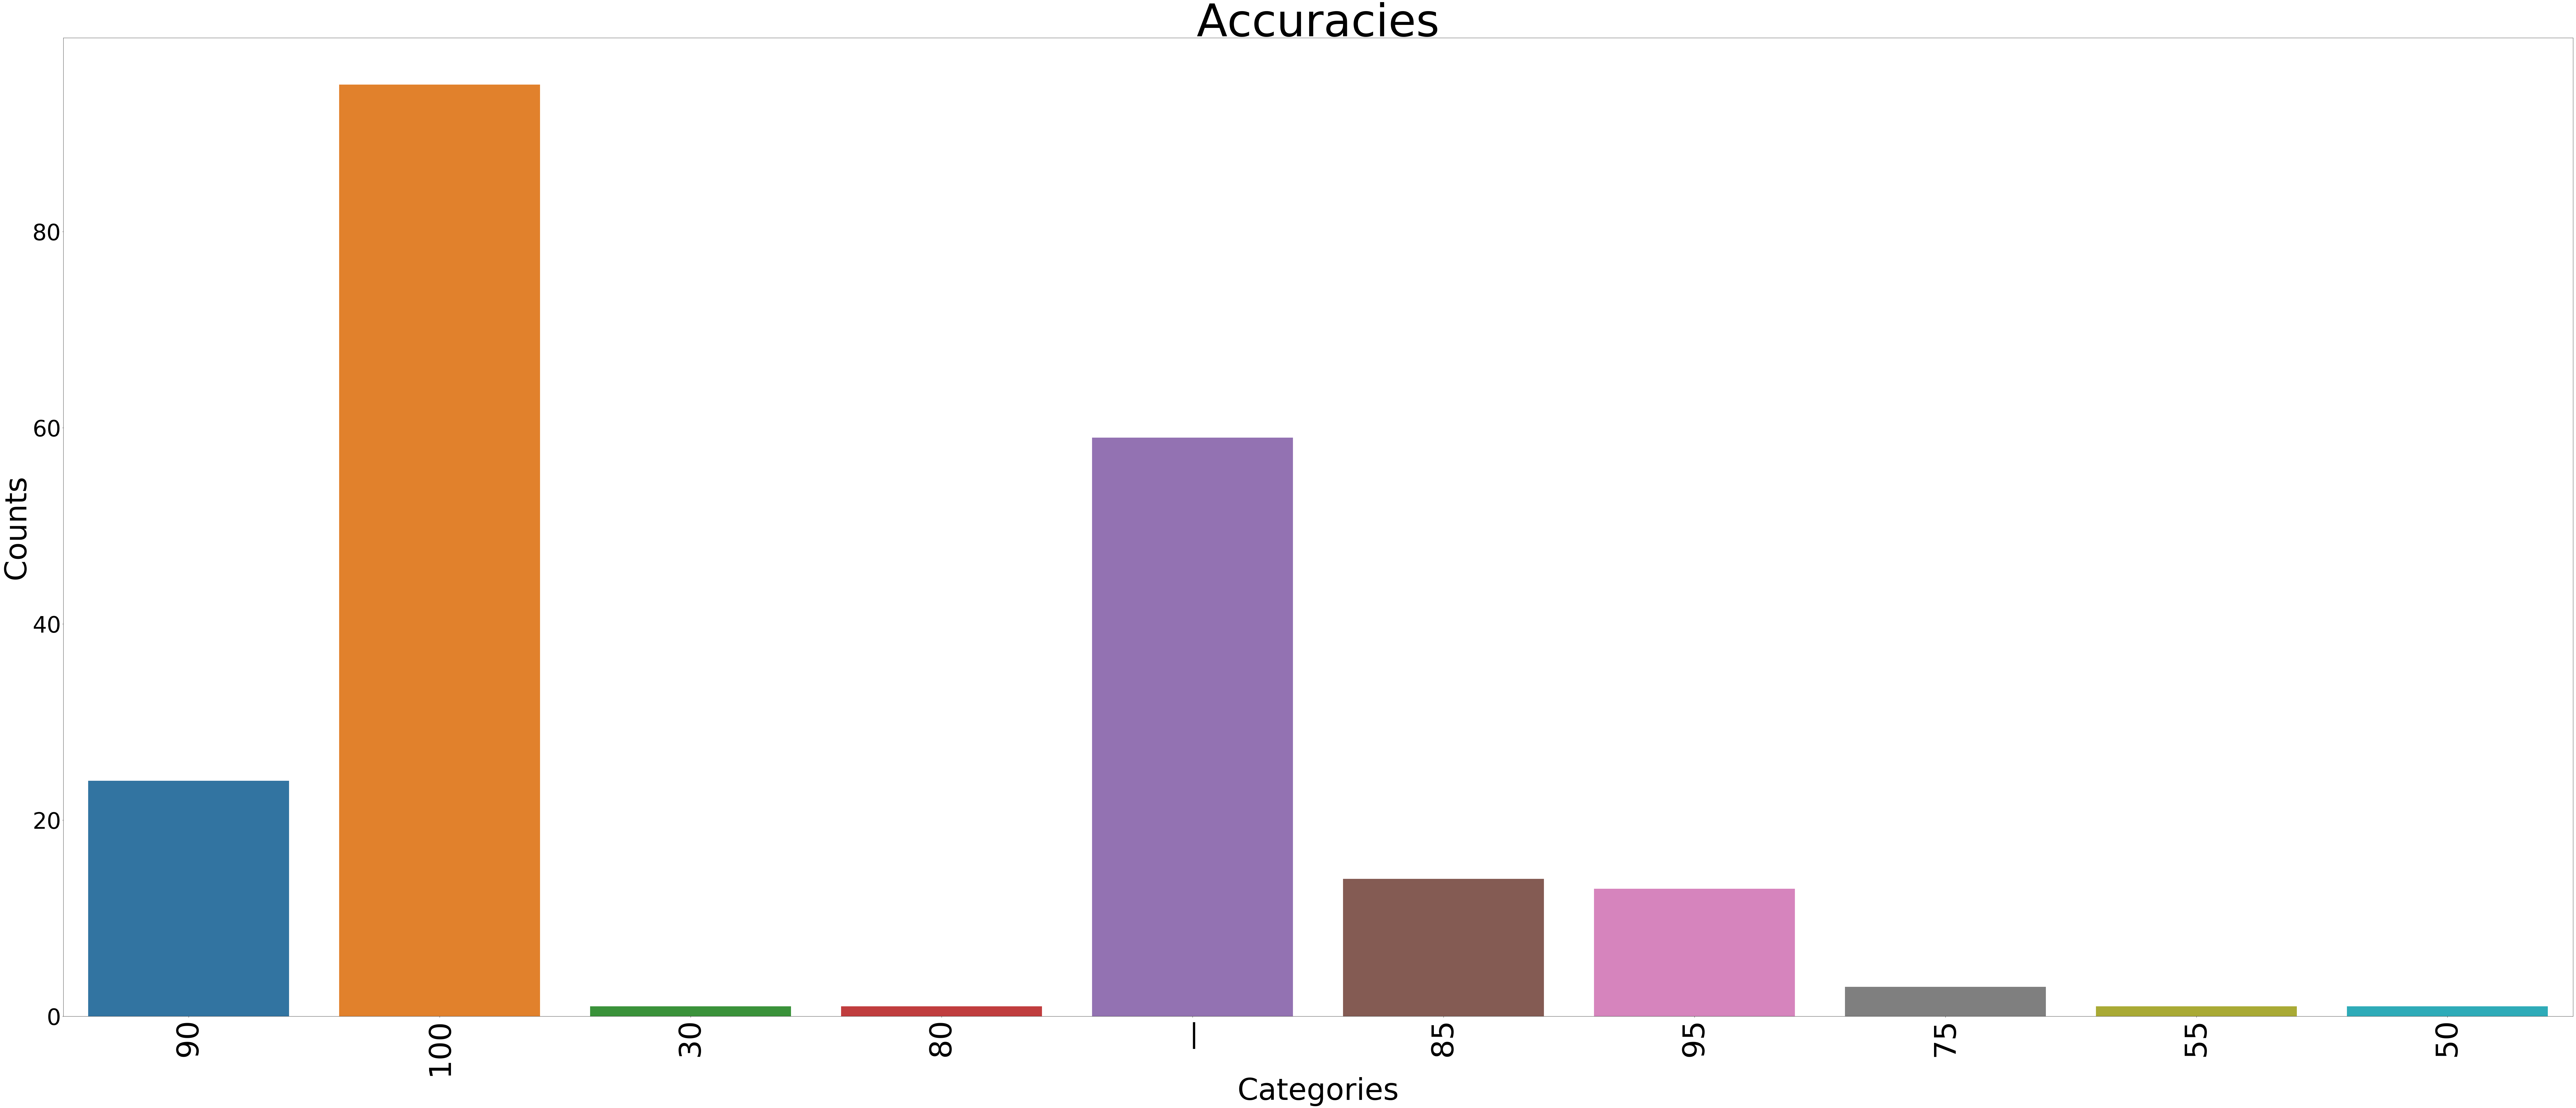

Handling...  Generations


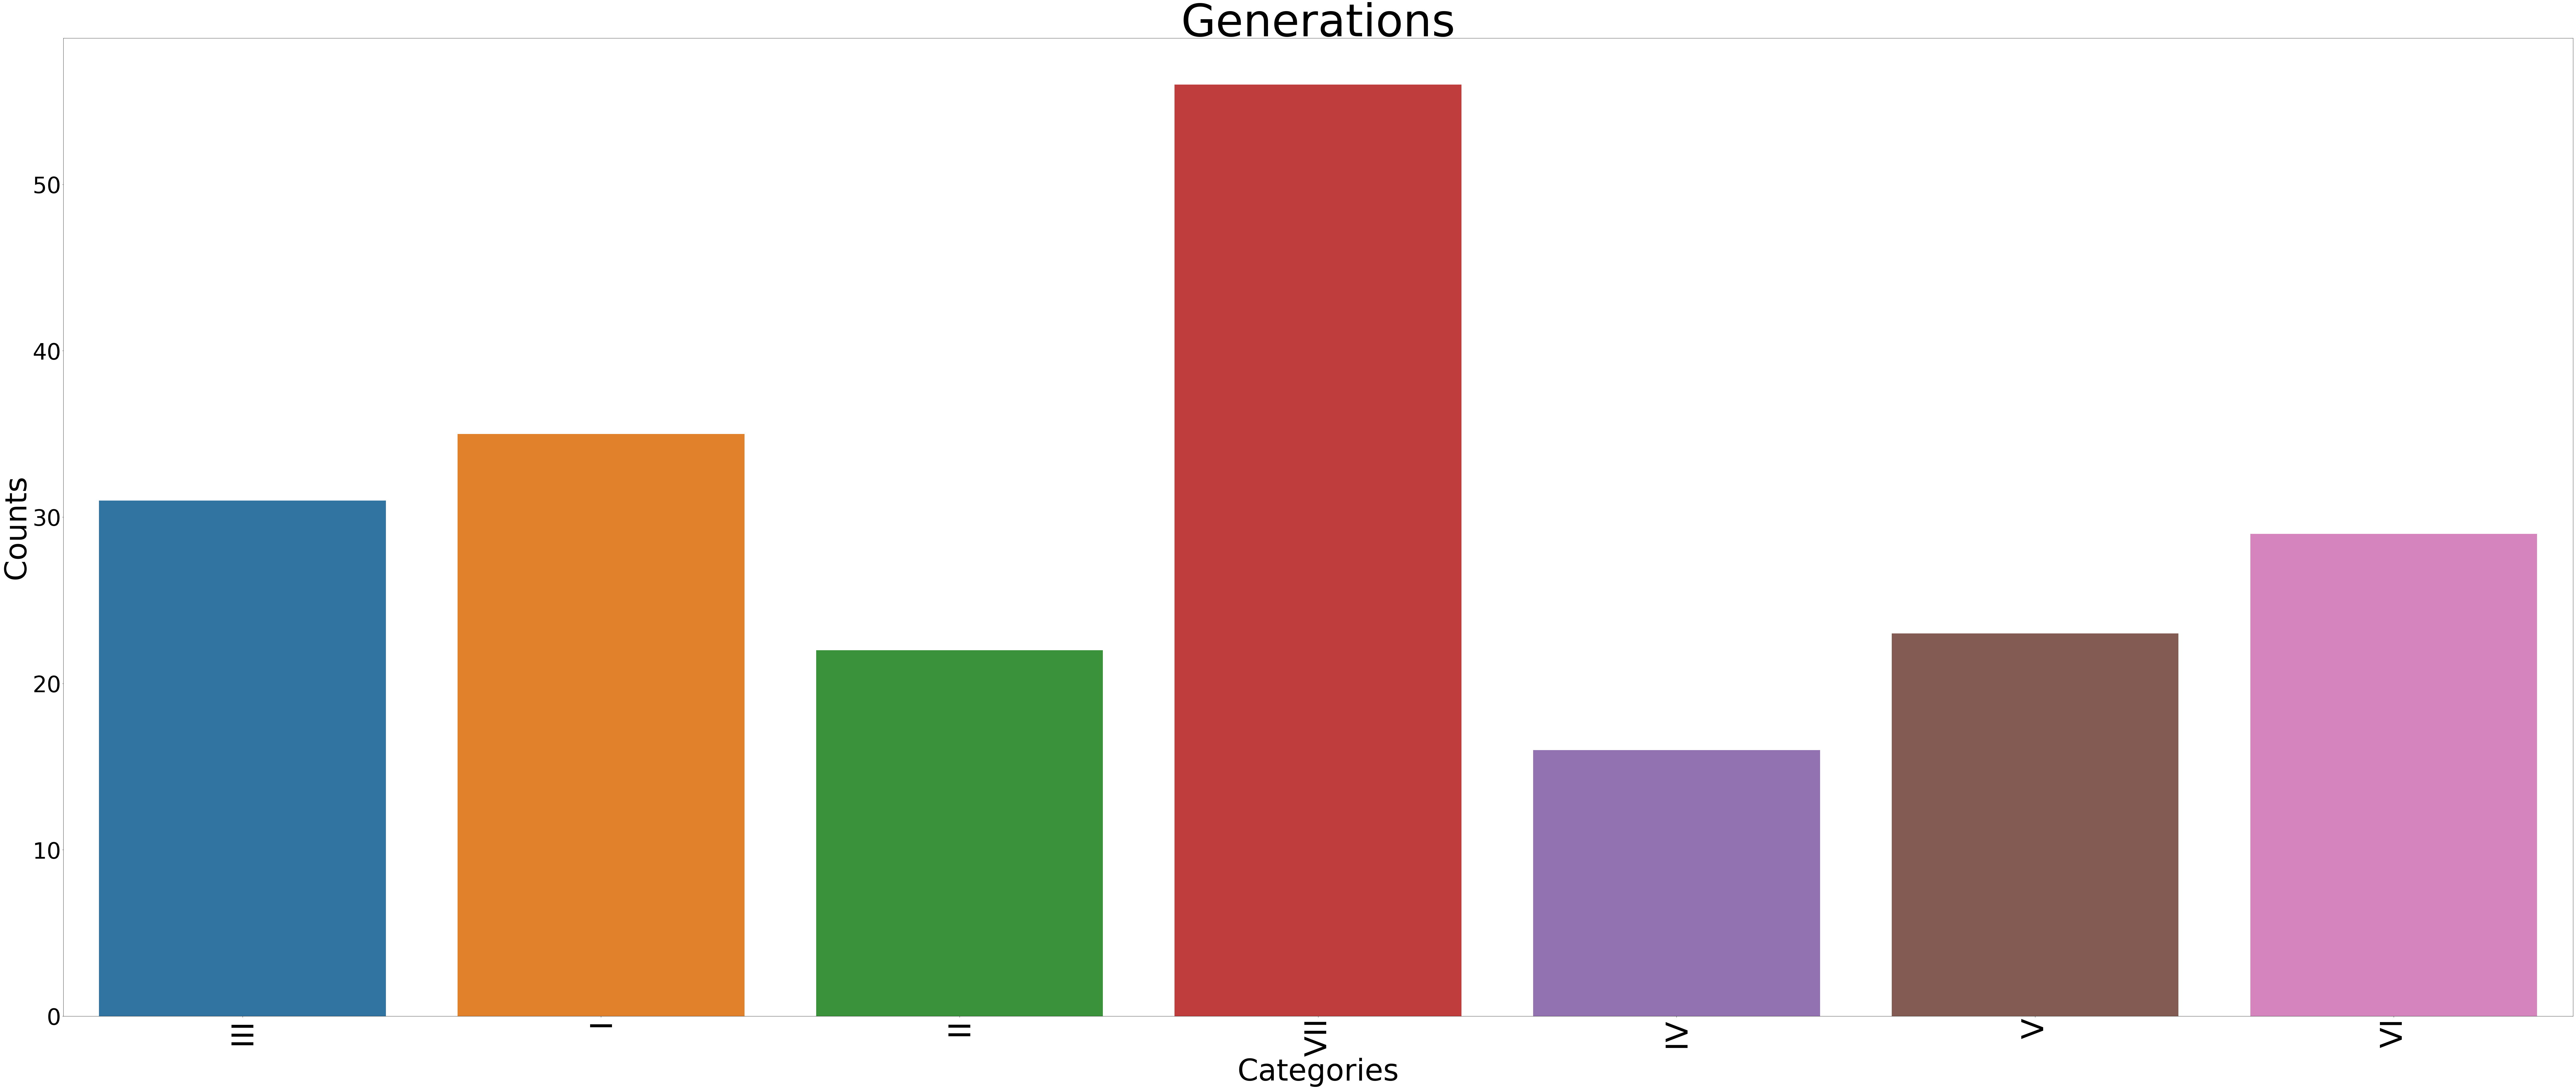

In [66]:
for i in range(0,len(target_dicts)):

    # Log
    print("Handling... ",tarstring_lst[i])
    
    # Obtain a list of respective values
    pltX = list(target_dicts[i].keys())
    pltY = list(target_dicts[i].values())

    # Create the bar plot with predetermined size
    plt.figure(figsize=(150,60))
    ax = sns.barplot(pltX,pltY)
    ax.set_xticklabels(list(target_dicts[i].keys()))

    # Labeling
    plt.title(tarstring_lst[i],fontsize=150)
    plt.ylabel('Counts', fontsize=100)
    plt.xlabel('Categories', fontsize=100)
    plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=100)
    plt.setp(ax.get_yticklabels(), fontsize=75)

    plt.show()